# Baseline Surface Radiation Network (BSRN)

The [Baseline Surface Radiation Network (BSRN)](https://bsrn.awi.de/) is a global network of high-quality solar irradiance monitoring stations under the [World Climate Research Programme (WCRP)](https://www.wcrp-climate.org/) (Driemel et al., 2018). The procedures of the BSRN are described in great detail in the [BSRN Operations Manual
Version 2.1](https://bsrn.awi.de/fileadmin/user_upload/bsrn.awi.de/Publications/McArthur.pdf).

According to the [World Radiation Monitoring Center (WRMC)](https://bsrn.awi.de/project/objectives/):
> The data [from the BSRN stations] are of primary importance in supporting the validation and confirmation of satellite and computer model estimates of these quantities. At a small number of stations (currently 74 in total, 58 active) in contrasting climatic zones, covering a latitude range from 80°N to 90°S, solar and atmospheric radiation is measured with instruments of the highest available accuracy and with high time resolution.

A list of active, inactive, and candidate BSRN stations can be retrieved from the SolarStations.Org [station catalog](../station_catalog) and are shown on the map below.


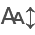

In [1]:
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

stations = pd.read_csv('../solarstations.csv').fillna('')
stations = stations[stations['Network'].str.contains('BSRN')]
del stations['URL']  # Remove the URL column to avoid cluttering the site
show(stations, scrollY="200px", scrollX=True, scrollCollapse=True, paging=False, classes="display", order=[[0, "asc"]],
     showIndex=False, columnDefs=[{"className": "dt-left", "targets": "_all"}])

In [2]:
import folium
from folium import plugins
import folium_legend

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

# Create Folium map
m = folium.Map(
    location=[0, 15],
    zoom_start=1, min_zoom=1, max_bounds=True,
    control_scale=True,  # Adds distance scale in lower left corner
    tiles='openstreetmap',
)

def station_status(time_period):
    if time_period.endswith('-'):
        return 'Active'
        color = '#008000'  # Green for active stations
    elif (time_period == '') | time_period.endswith('?'):
        return 'Unknown'
    else:
        return 'Inactive'

stations['Status'] = stations['Time period'].map(station_status)

status_dict = {
    'Active': '#008000',  # Green for active stations
    'Unknown': '#3186cc',  # Blue for stations with unknown status
    'Inactive': '#ff422b',  # Red for inactive stations
}

stations['Color'] = stations['Status'].map(status_dict)

# Add each station to the map
for index, row in stations.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station name'] + ' - ' + str(row['State']) + ' ' + row['Country'],
        tooltip=row['Abbreviation'],
        radius=5, color=row['Color'],
        fill_color=row['Color'], fill=True).add_to(m)

folium.raster_layers.TileLayer(EsriImagery, name='World imagery', attr=EsriAttribution, show=False).add_to(m)
folium.LayerControl(position='topright').add_to(m)

# Additional options and plugins
# Note it's not possible to change the position of the scale
#plugins.MiniMap(toggle_display=True, zoom_level_fixed=3, minimized=True, position='bottomright').add_to(m)  # Add minimap to the map
plugins.Fullscreen(position='bottomright').add_to(m)  # Add full screen button to map
folium.LatLngPopup().add_to(m)  # Show latitude/longitude when clicking on the map
# plugins.LocateControl(position='topright').add_to(m)  # Add button for your position
# plugins.MeasureControl(position='topleft').add_to(m)  # Add distance length measurement tool

# Create legend
legend = folium_legend.make_legend(status_dict.keys(), status_dict.values(), title="Station status")
m.get_root().html.add_child(legend)  # Add Legend to map

# Show the map
m

## Station requirements
All BSRN stations are required to meet the basic [station requirements](http://bsrn.awi.de/en/stations/join-bsrn/), which include measuring direct normal (DNI), diffuse horizontal (DHI), global horizontal (GHI), and down-welling long-wave (LWD) irradiance.

Additional metadata may be found at the [BSRN website](https://wiki.pangaea.de/wiki/BSRN#Sortable_Table_of_Stations) and in the individual data files (e.g., horizon profile).

```{note}
Unlike some solar irradiance monitoring networks, the BSRN website does not have a subpage for each station (with photos, etc.). This would have been very useful when assessing the usage of the station, for example, in regards to the potential impact of nearby structures, etc. Note a few photos of the BSRN stations can be found [here](https://bsrn.awi.de/other/picture-gallery/). The station logbooks are also not available.
```

It should be noted that many of the BSRN stations are also part of national station networks. For example, the Southern Great Plains and the Eastern North Atlantic sites are part of the [ARM program](https://www.arm.gov/) under the US Department of Energy. Similarly, all of the stations in the [SURFRAD network](https://gml.noaa.gov/grad/surfrad/) all part of the BSRN.

## Data quality

It should be noted that BSRN stations do not receive specific funding but rely on national funding (e.g., meteorological institutes or research organizations) which represents a serious challenge when making long-term measurements. While the instrumentation used at BSRN stations represents the state-of-the-art, quality procedures and maintenance practices vary greatly, and consequently data quality. For example, the Cabauw (CAB) station is a station with a generally very high data quality partly owing to station inspections each work day. In contrast, data from the Brasilia (BRB), Gandhinagar (GAN), and Gurgaon (GUR) stations have been found to have periods with low data quality. In short, any kind of irradiance measurements should not be used without meticulous inspection by the data user.

```{warning}
WRMC highly recommends that all users do their own quality checks of the data after extracting BSRN-data!
```

## Data retrieval

Data from the BSRN stations are stored in monthly files for each station and can be freely downloaded either via [FTP](https://bsrn.awi.de/?id=387) or from the [Pangea](https://bsrn.awi.de/data/data-retrieval-via-pangaea/) data portal (the data is identical to the data on Pangea. Credentials for accessing the BSRN FTP server can be obtained as described in the [data release guidelines](https://bsrn.awi.de/data/conditions-of-data-release). All of the files on the FTP server are in the rather archaic station-to-archive file format, which is described in the [Update of the Technical Plan for BSRN data management](https://bsrn.awi.de/fileadmin/user_upload/bsrn.awi.de/Publications/Hegner.pdf). There is no standard for when data becomes available, which can vary between a few months to more than a year.

```{admonition} Data release guidelines
Please read the [BSRN data release guidelines](https://bsrn.awi.de/data/conditions-of-data-release/) before using any data and make sure to properly cite the BSRN.
```

The station-to-archive files can be parsed and downloaded using the [pvlib-python](https://pvlib-python.readthedocs.io) library, specifically the [`pvlib.iotools.get_bsrn`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_bsrn.html) function. If you use the pvlib iotools for published work, please cite Jensen et al. (2023) which provides additional background information. An example of how to use pvlib to download two months of data from the Cabauw (CAB) station is shown below:

In [3]:
import os
bsrn_username = os.environ.get("BSRN_FTP_USERNAME")
bsrn_password = os.environ.get("BSRN_FTP_PASSWORD")

```{margin} Available parameters
Click the "Click to show" button to see the first 12 data entries.
```

In [4]:
import pvlib

df, meta = pvlib.iotools.get_bsrn(
    station='CAB',  # three letter code for the Cabauw station
    start=pd.Timestamp(2018,6,1),
    end=pd.Timestamp(2018,7,14),
    username=bsrn_username,  # replace with your own username
    password=bsrn_password,  # replace with your own password
)

show(df.head(), scrollX=True, scrollCollapse=True, paging=False, maxColumns=100, dom="tpr")

C:\Users\arajen\Anaconda3\envs\solarstations\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


error_perm: 530 Login incorrect.

For a description of the input parameters, see the [pvlib documentation](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_bsrn.html).

```{admonition} Retrieving BSRN data in R
:class: dropdown
R users can find similar functionality in the [SolarData](https://github.com/dazhiyang/SolarData) R package.
```

The data retrieved from all BSRN stations includes measurements of the three irradiance components, as well as longwave downwelling irradiance, temperature, and humidity.

A few of the parameters in the retrieved dataset are visualized below:

In [ ]:
axes = df[['ghi','dni','dhi','lwd','temp_air']].plot(
    subplots=True, legend=False, rot=0, figsize=(8,8), sharex=True)

# Set y-labels and y-limits
axes[0].set_ylabel('GHI [W/m$^2$]'), axes[0].set_ylim(-10,1300)
axes[1].set_ylabel('DNI [W/m$^2$]'), axes[1].set_ylim(-10,1300)
axes[2].set_ylabel('DHI [W/m$^2$]'), axes[2].set_ylim(-10,1300)
axes[3].set_ylabel('LWD [W/m$^2$]'), axes[4].set_ylim(200,500)
_ = axes[4].set_ylabel('Temperature [°]'), axes[4].set_ylim(0,40)

Notice how there are multiple periods where there is gaps in the irradiance data.

## References

* A. Driemel, J. Augustine, K. Behrens, S. Colle, C. Cox, E. Cuevas-Agulló, F. M. Denn, T. Duprat, M. Fukuda, H. Grobe, M. Haeffelin, G. Hodges, N. Hyett, O. Ijima, A. Kallis, W. Knap, V. Kustov, C. N. Long, D. Longenecker, A. Lupi, M. Maturilli, M. Mimouni, L. Ntsangwane, H. Ogihara, X. Olano, M. Olefs, M. Omori, L. Passamani, E. B. Pereira, H. Schmithüsen, S. Schumacher, R. Sieger, J. Tamlyn, R. Vogt, L. Vuilleumier, X. Xia, A. Ohmura, and G. König-Langlo. Baseline surface radiation network (BSRN): structure and data description (1992–2017). Earth System Science Data, 10(3):1491–1501, 2018. doi: [10.5194/essd-10-1491-2018](https://doi.org/10.5194/essd-10-1491-2018).
* Adam R. Jensen, Kevin S. Anderson, William F. Holmgren, Mark A. Mikofski, Clifford W. Hansen, Leland J. Boeman, and Roel Loonen. Pvlib iotools—open-source python functions for seamless access to solar irradiance data. Solar Energy, 266:112092, 2023. doi: [10.1016/j.solener.2023.112092](https://doi.org/10.1016/j.solener.2023.112092)..